In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name : str
    values: List[int]
    result: str

In [10]:
def process_values(state:AgentState) -> AgentState:
    """ This function sums the values """
    state['result'] = f"Hello {state['name']}!, Your sum is: {sum(state['values'])}"
    return state

In [11]:
graph = StateGraph(AgentState)
graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app = graph.compile()

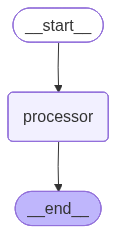

In [16]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
answer = app.invoke({"name": "Bob", "values": [1,2,3,4,5] })

In [15]:
print(answer['result'])

Hello Bob!, Your sum is: 15


In [2]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
import math

In [3]:
class AgentState2(TypedDict):
    name : str
    values : List[int]
    operation : str
    result :str

In [4]:
def operation_node(state: AgentState2) -> AgentState2:
    if (state["operation"] == "*"):
        state["result"] = f"Hi {state["name"]}, your answer is {math.prod(state["values"])}"
    elif (state["operation"] == "+"):
        state["result"] = f"Hi {state["name"]}, your answer is {sum(state["values"])}"
    else:
        state["result"] = f"Invalid operation!"    
    return state

In [ ]:
graph = StateGraph(AgentState2)

graph.add_node("operation", operation_node)
graph.set_entry_point("operation")
graph.set_finish_point("operation")
app2 = graph.compile()

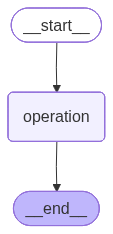

In [9]:
from IPython.display import display, Image
display(Image(app2.get_graph().draw_mermaid_png()))

In [15]:
result = app2.invoke({"name": "Jack Sparrow", "values": [1,2,3,4], "operation": "*"})

In [16]:
print(result["result"])

Hi Jack Sparrow, your answer is 24
